In [1]:
from ESN import simple_ESN as sesn
import ESN
import ESNteachers as teach
import numpy as np
import aux
import matplotlib.pyplot as plt
import math as mt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
xtrain = teach.sine_teacher(f=1.0, amp=1.0, length=400)
ytrain = teach.cosine_teacher(f=1.0, amp=1.0, length=400)
ztrain = teach.linear_teacher(length=400, dt=0.01)
yz = np.concatenate((ytrain,ztrain), axis=1)
xrun = teach.sine_teacher(f=1.0, amp=1.0, length=30000)
yrun = teach.cosine_teacher(f=1.0, amp=1.0, length=30000)
zrun = teach.linear_teacher(length=30000)

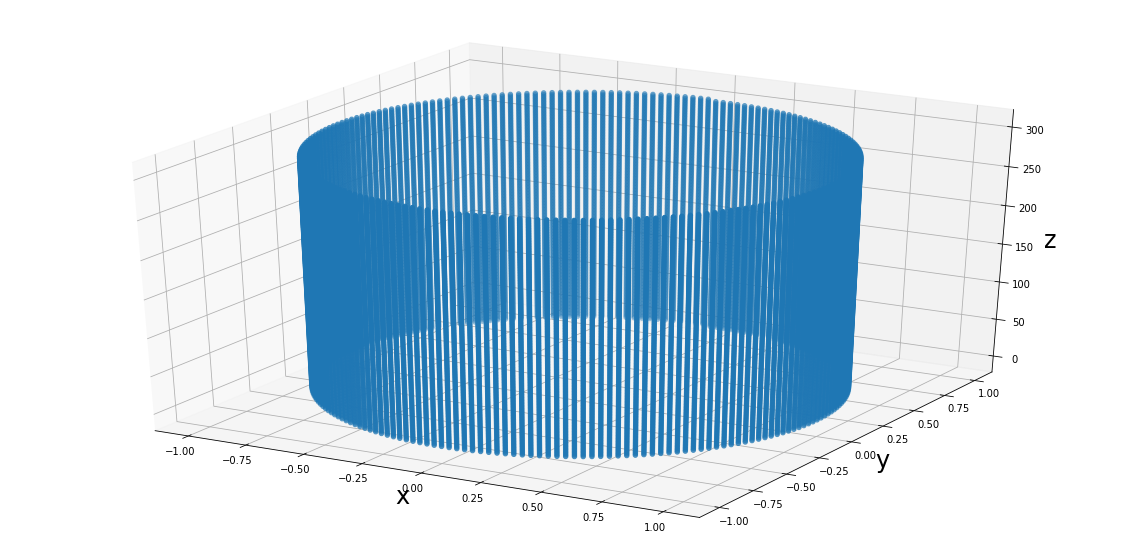

In [3]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(xrun, yrun, zrun, marker='o')
ax.set_xlabel('x',fontsize=24)
ax.set_ylabel('y',fontsize=24)
ax.set_zlabel('z',fontsize=24)
plt.show()

[0.4559108365886467, 171.04177014428072]

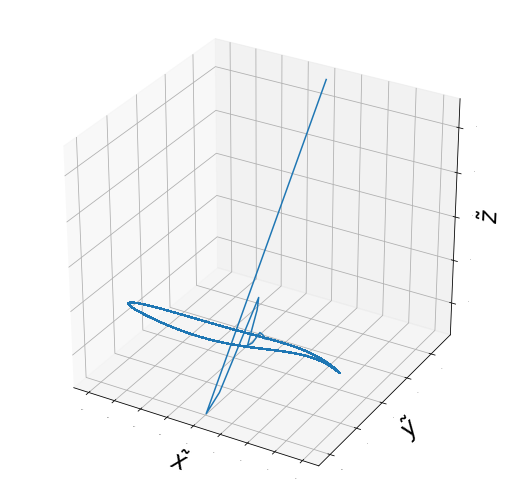

In [14]:
lor = sesn(N=5, K=1, L=2, binary_node=0,a=1.0)
W = lor.generate_W(rho=1.0, dens=0.25, cont=0)
Win=lor.generate_Win(dens=0.8)

trainx = lor.train_ESN(input_dat=xtrain, teacher=yz, around=1, order=2, washout=100, mp=False, B=10**-2)

testrunx = lor.run_ESN(input_dat=xrun,around=1, order=2,time=30000)

lorattractorx=lor.plot_attractor(name='testnonchaosx')

xout = lor.outputs

xrun1, xrun2=np.hsplit(xout, 2)
xrms=[aux.RMS(xrun1, yrun), aux.RMS(xrun2, zrun)]
xrmse1=aux.RMS_over_t(xrun1, yrun)
xrmse2=aux.RMS_over_t(xrun2, zrun)
xrmse = [xrms, xrmse1, xrmse2]

xrms

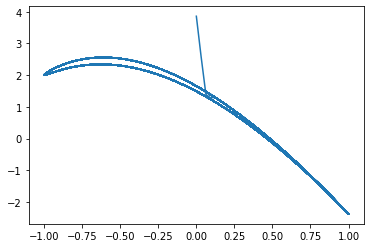

In [5]:
plt.plot(xrun, xrun1)

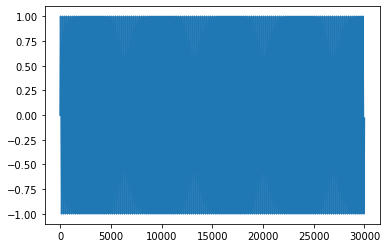

In [6]:
plt.plot(xrun)

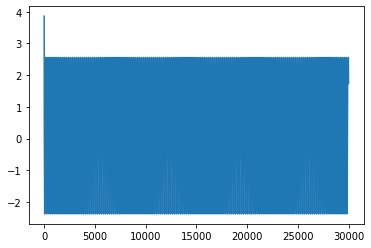

In [7]:
plt.plot(xrun1)

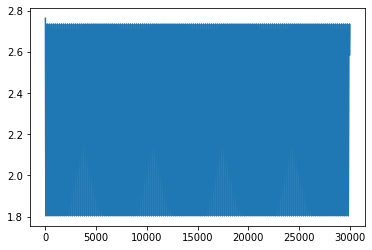

In [8]:
plt.plot(xrun2)

In [9]:
lor.M

array([[0.96655231, 0.8884495 , 0.66443953, 0.72371751, 0.97989271],
       [0.96523839, 0.88272051, 0.67135288, 0.71695002, 0.97793395],
       [0.96392523, 0.8770005 , 0.67825978, 0.71018931, 0.9759753 ],
       ...,
       [0.96153729, 0.87801088, 0.68592112, 0.70364105, 0.97033951],
       [0.96284572, 0.88373289, 0.67902938, 0.71038881, 0.97228701],
       [0.96415728, 0.88946288, 0.67212362, 0.71714982, 0.97424019]])

In [10]:
lor.T

array([[-1.00000000e+00,  1.00000000e+00],
       [-9.99506560e-01,  1.01000000e+00],
       [-9.98026728e-01,  1.02000000e+00],
       [-9.95561965e-01,  1.03000000e+00],
       [-9.92114701e-01,  1.04000000e+00],
       [-9.87688341e-01,  1.05000000e+00],
       [-9.82287251e-01,  1.06000000e+00],
       [-9.75916762e-01,  1.07000000e+00],
       [-9.68583161e-01,  1.08000000e+00],
       [-9.60293686e-01,  1.09000000e+00],
       [-9.51056516e-01,  1.10000000e+00],
       [-9.40880769e-01,  1.11000000e+00],
       [-9.29776486e-01,  1.12000000e+00],
       [-9.17754626e-01,  1.13000000e+00],
       [-9.04827052e-01,  1.14000000e+00],
       [-8.91006524e-01,  1.15000000e+00],
       [-8.76306680e-01,  1.16000000e+00],
       [-8.60742027e-01,  1.17000000e+00],
       [-8.44327926e-01,  1.18000000e+00],
       [-8.27080574e-01,  1.19000000e+00],
       [-8.09016994e-01,  1.20000000e+00],
       [-7.90155012e-01,  1.21000000e+00],
       [-7.70513243e-01,  1.22000000e+00],
       [-7.

In [11]:
lor.W_out

array([[ -8.87931044,  34.49875576,  12.51760646,  -7.2147595 ,
        -25.85926705],
       [ -0.48704834,   5.07212011,   2.59412259,  -0.74804736,
         -2.80299532]])

In [12]:
lor.W_in

array([[ 0.        ],
       [ 0.67122374],
       [-0.40838803],
       [ 0.53141727],
       [ 0.        ]])